In [2]:
import pandas as pd
import pyextremes 
from matplotlib import pyplot as plt
import numpy as np
from scipy.spatial import distance
import math
import os
df=pd.read_csv(r"C:\Users\Tusha\Visual Studio Codes\test_codeEVT\dataset\Majestic.csv")
df['Track ID'] = df['Track ID'].astype(int)
df=df[df['Track ID']>=1]
df['Track ID'] = df['Track ID'].sort_values()
# print(df.count())
df.head(100)
unique_tracks_per_type = df.groupby('Type')['Track ID'].nunique()
print(unique_tracks_per_type)
print(f'total {sum(unique_tracks_per_type)}')
print(df['TimeStamp'].max())

Type
 Bicycle           1
 Bus              61
 Car            1040
 Light Truck     203
 Motorcycle     3011
 Pedestrian     1069
 Tractor           1
 Tuk-Tuk        1740
 Van               9
Name: Track ID, dtype: int64
total 7135
5529.92


In [7]:
df_clean=df[['Track ID','TimeStamp','Type','X','Y']].dropna()


In [8]:

def speed(a,b):
    return math.sqrt(a**2+b**2)
i=0
minSpeedThresh=2
maxSpeedThresh=120
Dx=[]
Dy=[]
while i<len(df_clean):
    if ((i+1)==len(df_clean)):
        pass
    elif(df_clean['Track ID'].iloc[i+1]!=df_clean['Track ID'].iloc[i]):
        pass
    else:
        dt=df_clean['TimeStamp'].iloc[i+1]-df_clean['TimeStamp'].iloc[i]
        if dt==0:
            dt=0.16
        dx=df_clean['X'].iloc[i+1]-df_clean['X'].iloc[i]
        dy=df_clean['Y'].iloc[i+1]-df_clean['Y'].iloc[i]

    Dx.append(dx)
    Dy.append(dy)
    i+=1

# print(len(velX),len(velY),len(head_angle),len(df_clean))
# print(velX[:20])

# print(df_clean.head(10))
# df_clean2=df_clean[(df_clean['Speed']>minSpeedThresh) & (df_clean['Speed']<maxSpeedThresh)]
# df_clean3=df_clean[df_clean['Speed']>maxSpeedThresh]
# print(df_clean.count())




KeyboardInterrupt: 

In [ ]:
df_clean['dx'] = Dx
df_clean['dy'] = Dy
df_clean['Speed'] = np.sqrt(df_clean['dx']**2 + df_clean['dy']**2) / dt
df_clean['Speed'] = df_clean['Speed'].fillna(0)
df_clean['Vx'] = df_clean['dx'] / dt  
df_clean['Vx'] = df_clean['Vx'].fillna(0) 
df_clean['Vy'] = df_clean['dy'] / dt  
df_clean['Vy'] = df_clean['Vy'].fillna(0) 
df_clean['HA_rad'] = np.degrees(np.arctan2(df_clean['Vy'], df_clean['Vx']))
len(df_clean[df_clean['Type']==' Pedestrian']['Track ID'].unique())

1069

In [9]:
# df_clean.to_csv("dataset/processed/df_clean_001.csv",index=False)
# df_clean.to_csv("C:/Users/Tusha/_ISTLASB_/DATA/df_clean_001_BKP.csv",index=False)

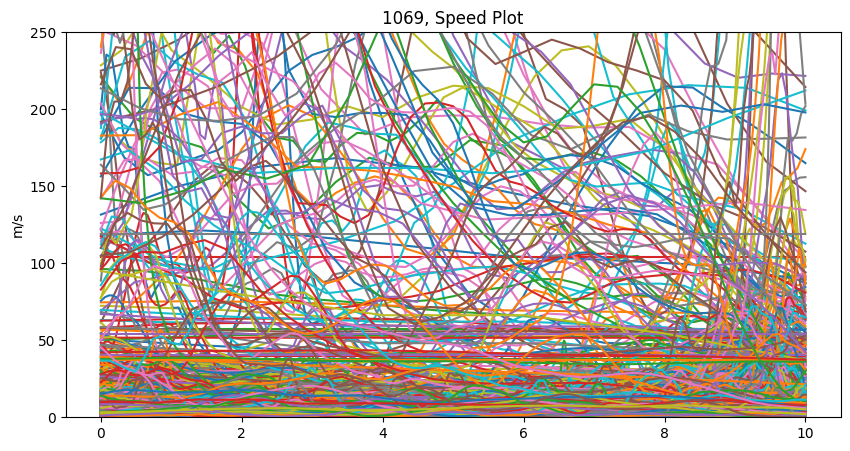

1069


In [10]:
df_clean=pd.read_csv(r"C:\Users\Tusha\Visual Studio Codes\test_codeEVT\dataset\Majestic.csv")
count=0
plt.figure(figsize=(10, 5))
allped=df_clean[df_clean['Type']==' Pedestrian']['Track ID'].unique()
for i in allped:
    z=df_clean[df_clean['Track ID']==i]['Speed'].count()
    x_axisx= np.linspace(0,10, z) 
    plt.plot(x_axisx,df_clean[df_clean['Track ID']==i]['Speed'])
    count+=1
    # if count>9:
    #     break
plt.title(f'{count}, Speed Plot')
plt.ylim(0,250)
plt.ylabel('m/s')
plt.show()
print(len(df_clean[df_clean['Type']==' Pedestrian']['Track ID'].unique()))


Number of pedestrians with all speeds > 10 m/s: 144


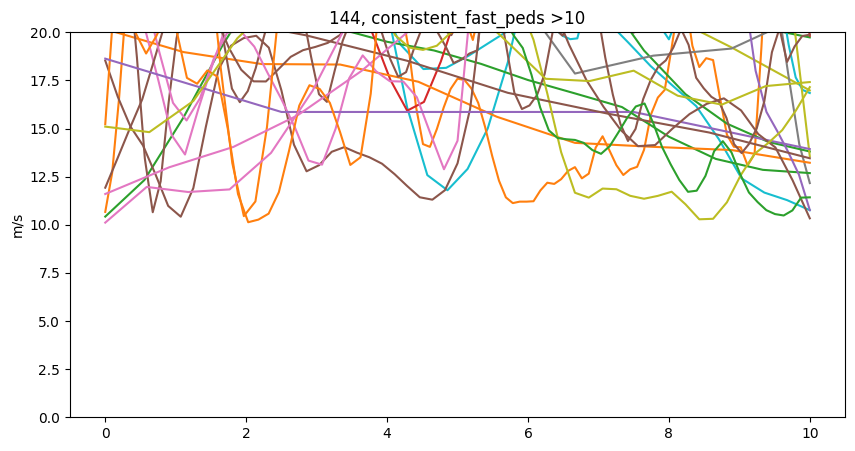

In [12]:
pedestrians = df_clean[df_clean['Type'] == ' Pedestrian']
fast_speed_thresh=10
fast_peds = (pedestrians
             .groupby('Track ID')['Speed']
             .apply(lambda x: x.min() > fast_speed_thresh)  # All speeds must be > 2
             .reset_index(name='fast_Speed'))

# Get the Track IDs that meet this criteria
consistent_fast_peds = fast_peds[fast_peds['fast_Speed']]['Track ID'].unique()

print(f"Number of pedestrians with all speeds > {fast_speed_thresh} m/s: {len(consistent_fast_peds)}")
# print("Track IDs:", consistent_fast_peds)
count=0
plt.figure(figsize=(10, 5))
for i in consistent_fast_peds :
    z=df_clean[df_clean['Track ID']==i]['Speed'].count()
    x_axisx= np.linspace(0,10, z) 
    plt.plot(x_axisx,df_clean[df_clean['Track ID']==i]['Speed'])
    count+=1
    # if count>20:
    #     break
plt.title(f'{count}, consistent_fast_peds >{fast_speed_thresh}')
plt.ylim(0,20)
plt.ylabel('m/s')
plt.show()


In [ ]:
# df_clean = df_clean[~df_clean['Track ID'].isin(consistent_fast_peds)].copy()

Number of pedestrians with all speeds <10: 238


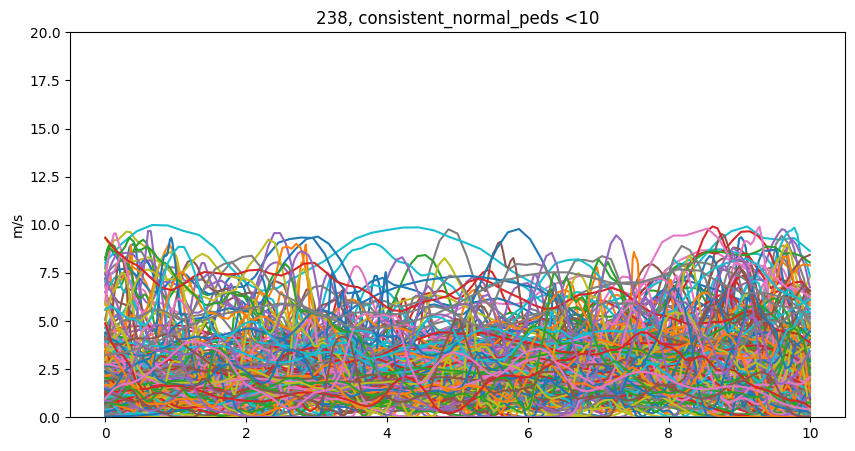

In [13]:
normal_speed_threshold=10
normal_peds = (pedestrians
             .groupby('Track ID')['Speed']
             .apply(lambda x: x.max() <normal_speed_threshold)  
             .reset_index(name='normal'))


consistent_normal_peds = normal_peds[normal_peds['normal']]['Track ID'].unique()

print(f"Number of pedestrians with all speeds <{normal_speed_threshold}: {len(consistent_normal_peds)}")
# print("Track IDs:", consistent_fast_peds)
count=0
plt.figure(figsize=(10, 5))
for i in consistent_normal_peds :
    z=df_clean[df_clean['Track ID']==i]['Speed'].count()
    x_axisx= np.linspace(0,10, z) 
    plt.plot(x_axisx,df_clean[df_clean['Track ID']==i]['Speed'])
    count+=1
    # if count>20:
    #     break
plt.title(f'{count}, consistent_normal_peds <{normal_speed_threshold}')
plt.ylim(0,20)
plt.ylabel('m/s')
plt.show()


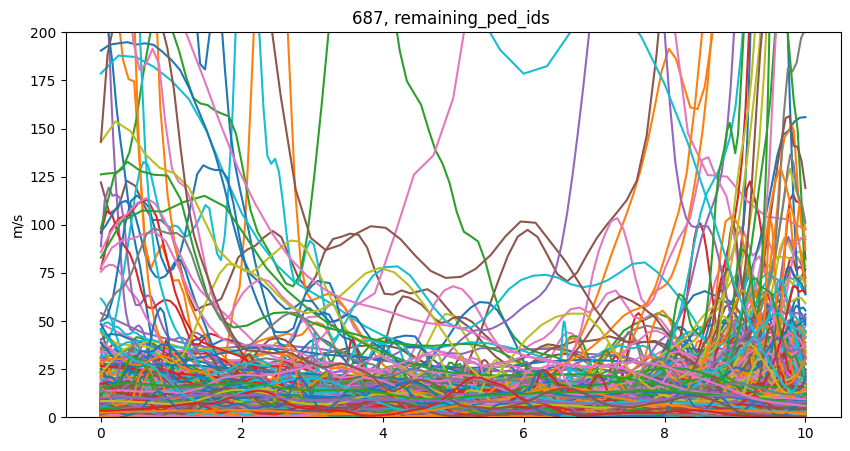

[   69.    97.   170.   215.   233.   269.   282.   292.   335.   351.
   369.   381.   382.   408.   410.   417.   436.   438.   568.   665.
   695.   701.   706.   720.   724.   745.   762.   789.   809.   811.
   839.   849.  1061.  1064.  1067.  1095.  1110.  1168.  1180.  1186.
  1188.  1195.  1206.  1209.  1210.  1214.  1282.  1290.  1291.  1350.
  1419.  1518.  1524.  1569.  1636.  1638.  1651.  1662.  1668.  1677.
  1749.  1752.  1769.  1823.  1932.  1963.  2061.  2082.  2083.  2116.
  2168.  2179.  2185.  2189.  2190.  2191.  2198.  2207.  2221.  2222.
  2227.  2234.  2309.  2310.  2318.  2325.  2511.  2513.  2525.  2529.
  2531.  2532.  2571.  2578.  2591.  2616.  2626.  2628.  2630.  2637.
  2708.  2710.  2741.  2742.  2758.  2772.  2793.  2797.  2822.  2843.
  2860.  2864.  2867.  2885.  2897.  2933.  2971.  2978.  3019.  3113.
  3127.  3137.  3156.  3195.  3198.  3210.  3237.  3262.  3277.  3285.
  3293.  3316.  3326.  3349.  3370.  3381.  3389.  3394.  3409.  3412.
  3460

In [ ]:
all_ped=df_clean[(df_clean['Type']==' Pedestrian') ]['Track ID'].unique()
remaining_ped_ids = np.setdiff1d(all_ped,consistent_normal_peds)
remaining_ped_ids = np.setdiff1d(remaining_ped_ids,consistent_fast_peds)
count=0
plt.figure(figsize=(10, 5))
# allped=df_clean[df_clean['Type']==' Pedestrian']['Track ID'].unique()
for i in remaining_ped_ids :
    z=df_clean[df_clean['Track ID']==i]['Speed'].count()
    x_axisx= np.linspace(0,10, z) 
    plt.plot(x_axisx,df_clean[df_clean['Track ID']==i]['Speed'])
    count+=1
    # if count>20:
    #     break
plt.title(f'{count}, remaining_ped_ids ')
plt.ylim(0,200)
plt.ylabel('m/s')
plt.show()
print(remaining_ped_ids)

C:\Users\Tusha\AppData\Local\Temp\ipykernel_25348\262379320.py:16: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  .apply(lambda x: mode(x.round(1)).mode[0])  # Round to 0.1 m/s bins


Observed Ped= 1069
ped = 267 , avg speed [<3]


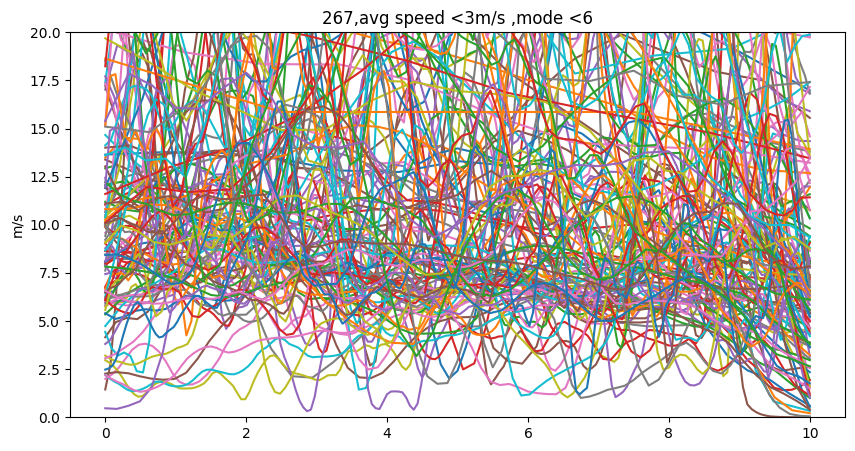

[   24.    31.    69.    97.   266.   282.   292.   307.   434.   465.
   474.   568.   665.   695.   701.   724.   836.   849.   938.  1067.
  1150.  1155.  1257.  1572.  1638.  1651.  1675.  1769.  1823.  1932.
  1952.  1985.  2048.  2051.  2222.  2531.  2537.  2539.  2555.  2562.
  2578.  2613.  2616.  2626.  2637.  2772.  2860.  2864.  3019.  3033.
  3114.  3144.  3244.  3277.  3389.  3394.  3419.  3683.  3698.  3832.
  4149.  4151.  4182.  4237.  4274.  4338.  4363.  4387.  4429.  4566.
  4573.  4604.  4681.  4716.  4728.  4804.  4827.  4828.  4858.  4981.
  4982.  5002.  5007.  5052.  5162.  5294.  5465.  5478.  5771.  5985.
  6116.  6146.  6176.  6506.  6558.  6566.  6737.  6754.  6760.  6811.
  6843.  6944.  6946.  7007.  7292.  7455.  7527.  7553.  7595.  7639.
  7657.  7668.  7669.  7675.  7683.  7689.  7695.  7738.  7755.  7771.
  7884.  7963.  7997.  8000.  8007.  8014.  8041.  8291.  8292.  8313.
  8347.  8348.  8351.  8468.  8475.  8607.  8709.  8717.  8725.  8732.
  8771

In [17]:
Average_speed_thr = 3
modThr=6

from scipy.stats import mode
df_clean=pd.read_csv(r"C:\Users\Tusha\Visual Studio Codes\test_codeEVT\dataset\Majestic.csv")
Ped_diag=(
    df_clean[df_clean['Type']==' Pedestrian']
    .groupby('Track ID')['Speed']
    .mean()
    .reset_index()
    .rename(columns={'Speed': 'Avg_Speed'})
    )
mode_speeds = (
    df_clean[df_clean['Type']==' Pedestrian']
    .groupby('Track ID')['Speed']
    .apply(lambda x: mode(x.round(1)).mode[0])  # Round to 0.1 m/s bins
    .reset_index()
    .rename(columns={'Speed': 'Mode_Speed'})
)

Ped_diag = Ped_diag.merge(mode_speeds, on='Track ID')
fast_pedestrians = Ped_diag[
    (Ped_diag['Avg_Speed'] >= Average_speed_thr)&
    (Ped_diag['Mode_Speed'] >= modThr) 
]['Track ID'].unique()
Obs_Ped=len(df_clean[(df_clean['Type']==' Pedestrian')]['Track ID'].unique())

print(f"Observed Ped= {Obs_Ped}")

print (f'ped = {(len(fast_pedestrians))} , avg speed [<{Average_speed_thr}]')
count=0
plt.figure(figsize=(10, 5))
# allped=df_clean[df_clean['Type']==' Pedestrian']['Track ID'].unique()
for i in fast_pedestrians :
    z=df_clean[df_clean['Track ID']==i]['Speed'].count()
    x_axisx= np.linspace(0,10, z) 
    plt.plot(x_axisx,df_clean[df_clean['Track ID']==i]['Speed'])
    count+=1
    # if count>20:
    #     break
plt.title(f'{count},avg speed <{Average_speed_thr}m/s ,mode <{modThr}')
plt.ylim(0,20)
plt.ylabel('m/s')
plt.show()
print(fast_pedestrians)



In [15]:

df_clean = df_clean[~df_clean['Track ID'].isin(fast_pedestrians)].copy()

In [1]:
all_ped=df_clean[(df_clean['Type']==' Pedestrian') ]['Track ID'].unique()
remaining_ped_ids = np.setdiff1d(all_ped,consistent_normal_peds)
count=0
plt.figure(figsize=(10, 5))
# allped=df_clean[df_clean['Type']==' Pedestrian']['Track ID'].unique()
for i in remaining_ped_ids :
    z=df_clean[df_clean['Track ID']==i]['Speed'].count()
    x_axisx= np.linspace(0,10, z) 
    plt.plot(x_axisx,df_clean[df_clean['Track ID']==i]['Speed'])
    count+=1
    # if count>50:
    #     break
plt.title(f'{count}, remaining_ped_ids ')
plt.ylim(0,200)
plt.ylabel('m/s')
plt.show()

NameError: name 'df_clean' is not defined

In [17]:
track_stats = (
    df_clean[df_clean['Type'] == ' Pedestrian']
    .groupby('Track ID')['TimeStamp']
    .agg(['min', 'max', 'count'])  # Get min/max timestamps and actual count
    .assign(
        Duration_sec=lambda x: x['max'] - x['min'],
        Expected_Points=lambda x: (x['max'] - x['min']) / 0.16,
        Point_Discrepancy=lambda x: x['count'] - x['Expected_Points']
    )
    .reset_index()
)

MIN_POINTS = 10  # Adjust as needed (e.g., 3 for very short tracks)
invalid_tracks = track_stats[track_stats['count'] < MIN_POINTS]['Track ID'].unique()
print(f"Found {len(invalid_tracks)} tracks with fewer than {MIN_POINTS} data points")

Found 0 tracks with fewer than 10 data points


Number of Car with all speeds > 30 m/s: 0


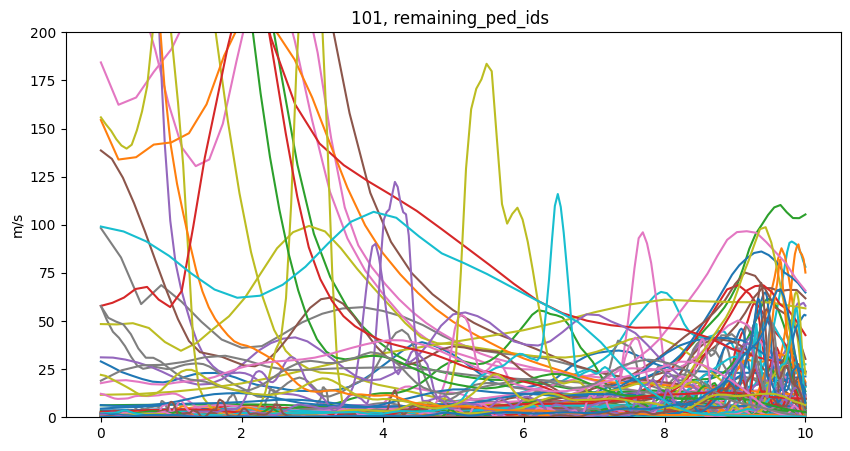

In [30]:
Car_df=df_clean[df_clean['Type']==' Car']['Track ID'].unique()
Car = df_clean[df_clean['Type'] == ' Car']
df_clean=pd.read_csv(r"C:\Users\Tusha\Visual Studio Codes\test_codeEVT\dataset\Majestic.csv")
fast_Car = (Car
             .groupby('Track ID')['Speed']
             .apply(lambda x: x.min() > 30)  
             .reset_index(name='All_Speeds_Above_2'))

consistent_fast_car = fast_Car[fast_Car['All_Speeds_Above_2']]['Track ID'].unique()
df_clean = df_clean[~df_clean['Track ID'].isin(consistent_fast_car)].copy()
print(f"Number of Car with all speeds > 30 m/s: {len(consistent_fast_car)}")
count=0
plt.figure(figsize=(10, 5))
# allped=df_clean[df_clean['Type']==' Pedestrian']['Track ID'].unique()
for i in Car_df :
    z=df_clean[df_clean['Track ID']==i]['Speed'].count()
    x_axisx= np.linspace(0,10, z) 
    plt.plot(x_axisx,df_clean[df_clean['Track ID']==i]['Speed'])
    count+=1
    if count>100:
        break
plt.title(f'{count}, remaining_ped_ids ')
plt.ylim(0,200)
plt.ylabel('m/s')
plt.show()

In [19]:
df_clean2=df_clean
df_clean2.drop(df_clean2[df_clean2['Track ID'].isin(outlires)].index, inplace=True)
Ped_diag=(
    df_clean2[df_clean2['Type']==' Pedestrian']
    .groupby('Track ID')['Speed']
    .mean()
    .reset_index()
    .rename(columns={'Speed': 'Avg_Speed'})
    )
Obs_Ped=len(df_clean2[(df_clean2['Type']==' Pedestrian')]['Track ID'].unique())
Obs_nonPed=len(df_clean2[df_clean2['Type']!=' Pedestrian']['Track ID'].unique())
fast_pedestrians = Ped_diag[(Ped_diag['Avg_Speed'] >= 0) & (Ped_diag['Avg_Speed'] <1.5)]['Track ID'].unique()
fast_cyclist = Ped_diag[(Ped_diag['Avg_Speed'] > 1.5) & (Ped_diag['Avg_Speed'] <12)]['Track ID'].unique()
outlires = Ped_diag[Ped_diag['Avg_Speed'] >12]['Track ID'].unique()

# print(Ped_diag)
print(f"Observed Ped= {Obs_Ped}")
print(f"Non Ped= {Obs_nonPed}")
print(f"% Ped= {Obs_Ped*100/Obs_nonPed:.2f}")
print (f'ped = {(len(fast_pedestrians))} , avg speed [0-1.5m/s]')
print (f"cyclist = {(len(fast_cyclist))} , avg speed [1.5-12m/s]")
print(f'outliers = {len(outlires)}, ({((Obs_Ped-len(fast_pedestrians)-len(fast_cyclist))*100/Obs_Ped):.2f}%) ')

df_clean2.to_csv("dataset/processed/Filt_1.csv")


NameError: name 'outlires' is not defined

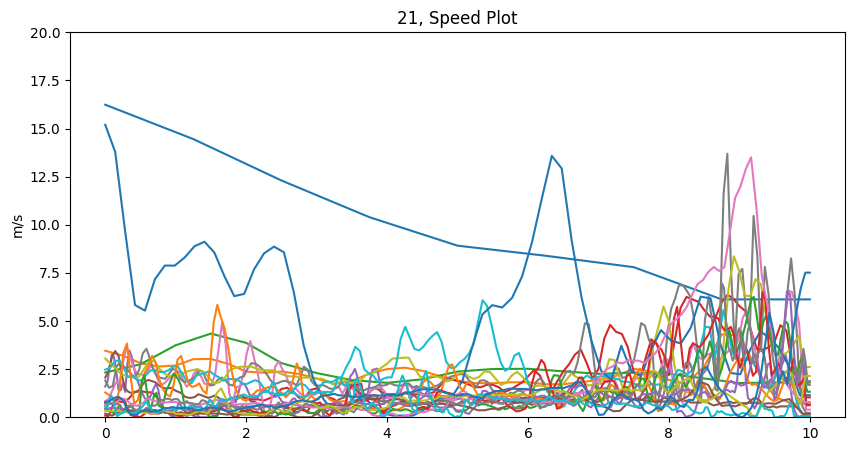

933


In [ ]:
df_clean2=pd.read_csv("dataset/processed/Filt_1.csv")
count=0
plt.figure(figsize=(10, 5))
allped=df_clean2[df_clean2['Type']==' Pedestrian']['Track ID'].unique()
for i in allped:
    z=df_clean2[df_clean2['Track ID']==i]['Speed'].count()
    x_axisx= np.linspace(0,10, z) 
    plt.plot(x_axisx,df_clean2[df_clean2['Track ID']==i]['Speed'])
    count+=1
    if count>20:
        break
plt.title(f'{count}, Speed Plot')
plt.ylim(0,20)
plt.ylabel('m/s')
plt.show()
print(len(df_clean2[df_clean2['Type']==' Pedestrian']['Track ID'].unique()))


# segment

In [ ]:
# Define segments
df_exp_1=pd.read_csv("dataset\processed\Filt_1.csv")
# Step 1: Identify pedestrian data
ped_mask = df_exp_1['Type'] == ' Pedestrian'

# Step 2: Define segments ONLY for pedestrians
ped_baseline = ped_mask & df_exp_1['Speed'].between(0, 1, inclusive='both')
ped_peaks = ped_mask & (df_exp_1['Speed'] > 5)

# Step 3: Initialize smoothed speed column (copy original first)
df_exp_1['Speed_smooth'] = df_exp_1['Speed']

# Step 4: Apply median filter ONLY to pedestrian peaks
df_exp_1.loc[ped_peaks, 'Speed'] = (
    df_exp_1[ped_peaks].groupby('Track ID')['Speed']
    .rolling(3, center=True, min_periods=1).median()
    .reset_index(level=0, drop=True)
)

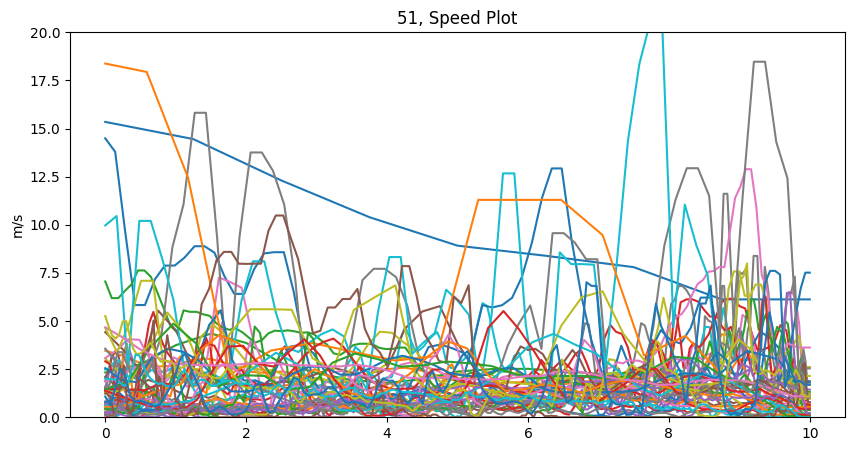

933


In [ ]:
count=0
plt.figure(figsize=(10, 5))
allped=df_exp_1[df_exp_1['Type']==' Pedestrian']['Track ID'].unique()
for i in allped:
    z=df_exp_1[df_exp_1['Track ID']==i]['Speed'].count()
    x_axisx= np.linspace(0,10, z) 
    plt.plot(x_axisx,df_exp_1[df_exp_1['Track ID']==i]['Speed'])
    count+=1
    if count>50:
        break
plt.title(f'{count}, Speed Plot')
plt.ylim(0,20)
plt.ylabel('m/s')
plt.show()
print(len(df_exp_1[df_exp_1['Type']==' Pedestrian']['Track ID'].unique()))

In [ ]:
dk = 0.16
max_speed = 1.5 
max_disp = max_speed * dk
df_clean['dx'] = df_clean['dx'].clip(-max_disp, max_disp)
df_clean['dy'] = df_clean['dy'].clip(-max_disp, max_disp)

In [ ]:

df_clean.to_csv("dataset/processed/df_clean_001.csv",index=False)
df_clean.to_csv("C:/Users/Tusha/_ISTLASB_/DATA/df_clean_001_BKP.csv",index=False)
# df_clean.head()

In [5]:
df_clean=pd.read_csv(r"C:\Users\Tusha\Visual Studio Codes\test_codeEVT\dataset\processed\df_clean_001.csv")
df_clean['Speed'].dtype

dtype('float64')

In [ ]:

Ped_diag=(
    df_clean[df_clean['Type']==' Pedestrian']
    .groupby('Track ID')['Speed']
    .mean()
    .reset_index()
    .rename(columns={'Speed': 'Avg_Speed'})
    )
fast_pedestrians = Ped_diag[Ped_diag['Avg_Speed'] < 2]['Track ID'].unique()
# print(Ped_diag)
print (len(fast_pedestrians))
# print(f"%outlire= {len(fast_pedestrians)*100/Obs_Ped}")

629


#clearly this is because of the noisy data

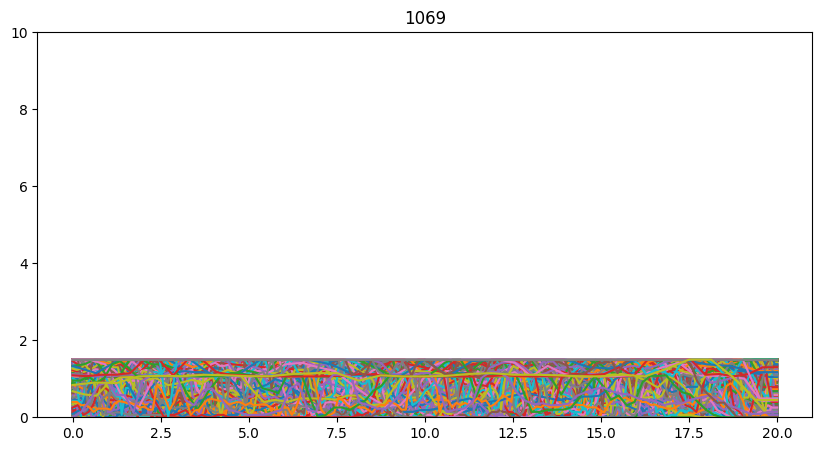

In [ ]:
# print (df_clean[df_clean['Track ID']==182].head())
# plt.plot(df_clean[df_clean['Track ID']==1572]['Speed'])
count=0
plt.figure(figsize=(10, 5))
allped=df_clean[df_clean['Type']==' Pedestrian']['Track ID'].unique()
for i in allped:
    z=df_clean[df_clean['Track ID']==i]['Speed'].count()
    x_axisx= np.linspace(0,20, z) 
    plt.plot(x_axisx,df_clean[df_clean['Track ID']==i]['Speed'])
    count+=1
plt.title(count)
plt.ylim(0,10)
plt.show()

# ___________________________________________________________________------_______________________________________________________

# ###############################################################################################################################

#check for dx,dy Limits

In [ ]:
dt = 0.16  # Time interval (s)
max_speed = 1.5  # Conservative pedestrian max speed (m/s)
max_disp = max_speed * dt  # ~0.24 m

# Check if ANY dx/dy exceeds the limit
invalid_peds = df_clean2[
    (df_clean2['Type'] == ' Pedestrian') & 
    ((abs(df_clean2['dx']) > max_disp) | (abs(df_clean2['dy']) > max_disp))
]['Track ID'].unique()

print(f"Pedestrians with implausible displacements: {len(invalid_peds)}")

In [ ]:
dt = 0.16  # Time interval (s)
max_speed = 1.5  # Conservative pedestrian max speed (m/s)
max_disp = max_speed * dt  # ~0.24 m

# Check if ANY dx/dy exceeds the limit
invalid_peds = df_clean2[
    (df_clean2['Type'] == ' Pedestrian') & 
    ((abs(df_clean2['dx']) > max_disp) | (abs(df_clean2['dy']) > max_disp))
]['Track ID'].unique()

print(f"Pedestrians with implausible displacements: {len(invalid_peds)}")

In [ ]:
total_rows=len(df_clean2[df_clean2['Type']==' Pedestrian'])
faulty_rows=df_clean2[
    (df_clean2['Speed']>15) &
    (df_clean2['Type']==' Pedestrian')
    ][['Track ID','Speed']]
mean_speeds = faulty_rows.groupby('Track ID')['Speed'].mean().reset_index(name='mean')
faulty_rows.columns
mean_faulty_ped=(mean_speeds[mean_speeds['mean']>15]['Track ID']
                 .unique()
                 )
print(len(mean_faulty_ped)*100/Obs_Ped)
# print(f'no of rows with speed >5m/s and mean{len(mean_faulty_row)/total_rows}')


26.4733395696913


In [ ]:
df_clean2['Acc']=(
    df_clean2
    .groupby('Track ID')['Speed']
    .diff() / 0.16
    )
df_clean2['Acc']
df_clean2['Acc'] = df_clean2['Acc'].fillna(0)
acc_max = 0.5  
df_clean2['Is_Noise'] = (df_clean2['Acc'].abs() > acc_max)  
print(df_clean2[df_clean2['Is_Noise']==True])

         Track ID  TimeStamp         Type          X           Y     Vx  \
48              1       7.68      Tuk-Tuk  778898.05  1435734.57 -0.063   
50              1       8.00      Tuk-Tuk  778898.05  1435734.57  0.000   
51              1       8.16      Tuk-Tuk  778898.05  1435734.57  0.063   
52              1       8.32      Tuk-Tuk  778898.06  1435734.56 -0.250   
53              1       8.48      Tuk-Tuk  778898.02  1435734.60 -0.375   
...           ...        ...          ...        ...         ...    ...   
1275046     16178    5529.12   Motorcycle  778889.51  1435762.13  0.125   
1275047     16178    5529.28   Motorcycle  778889.53  1435760.42  0.188   
1275048     16178    5529.44   Motorcycle  778889.56  1435758.86  0.000   
1275049     16178    5529.60   Motorcycle  778889.56  1435757.45 -0.063   
1275050     16178    5529.76   Motorcycle  778889.55  1435756.33  0.000   

             Vy   Speed       HA       Acc  Is_Noise  
48        0.063   0.088  135.000   0.55000  

total ped= 1069, fast ped= 1069, %= 100.0


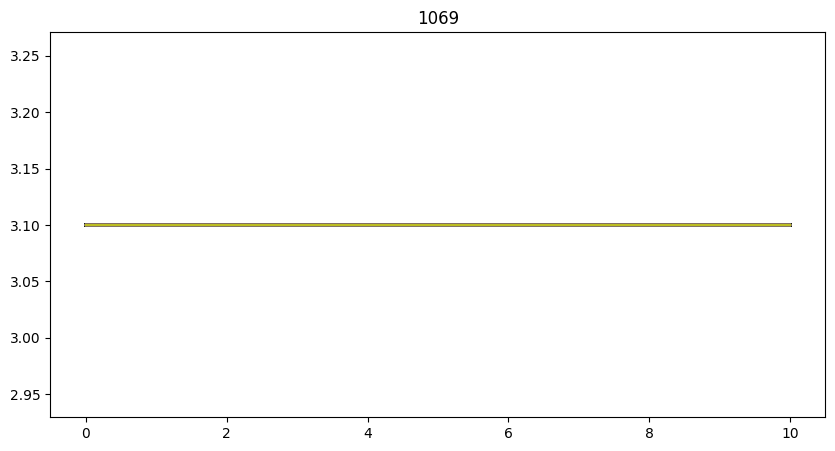

total ped= 1069, fast ped= 1069, %= 100.0


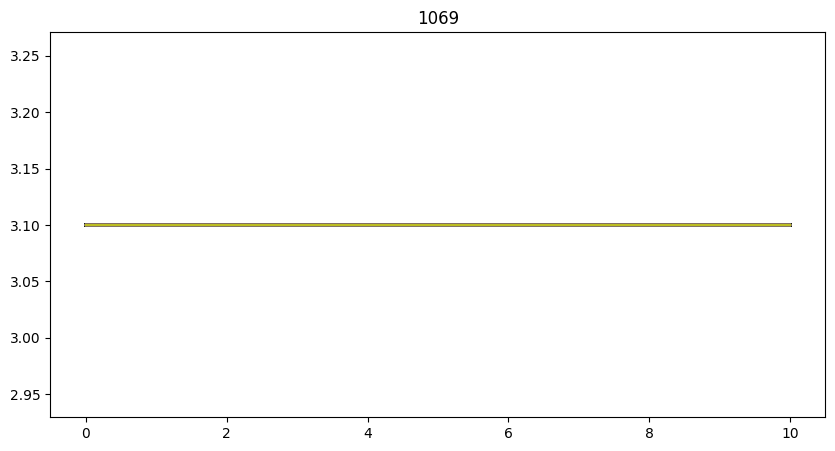

total ped= 1069, fast ped= 1069, %= 100.0


KeyboardInterrupt: 

In [ ]:
n=0
while n<3:
    window_size = 3  # Number of timesteps to average (adjust based on your needs)
    df_clean2['Speed_Smoothed'] = (
        df_clean2['Speed']
        .rolling(5, center=True).median()  # min_periods=1 avoids NaN for early rows
        .mean()
    )
    
    Ped_diag = (
        df_clean2[df_clean2['Type'] == ' Pedestrian']
        .groupby('Track ID')['Speed_Smoothed']
        .mean()
        .reset_index()
        .rename(columns={'Speed_Smoothed': 'Avg_Speed'})
    )
    All_ped=Ped_diag[Ped_diag['Avg_Speed'] > 0]['Track ID'].unique()
    fast_pedestrians = Ped_diag[Ped_diag['Avg_Speed'] >1.5]['Track ID'].unique()
    print(f'total ped= {len(All_ped)}, fast ped= {len(fast_pedestrians)}, %= {len(fast_pedestrians)*100/len(All_ped)}')
    count=0
    plt.figure(figsize=(10, 5))
    for i in fast_pedestrians:
        z=df_clean2[df_clean2['Track ID']==i]['Speed_Smoothed'].count()
        x_axisx= np.linspace(0,10, z) 
        plt.plot(x_axisx,df_clean2[df_clean2['Track ID']==i]['Speed_Smoothed'])
        count+=1
    plt.title(count)
    plt.show()
    df_clean2['Acc']=(
    df_clean2
    .groupby('Track ID')['Speed']
    .diff() / 0.16
    )
    df_clean2['Acc']
    df_clean2['Acc'] = df_clean2['Acc'].fillna(0)
    acc_max = 0.5  
    df_clean2['Is_Noise'] = (df_clean2['Acc'].abs() > acc_max)  
    # print(df_clean2[df_clean2['Is_Noise']==True])        # Optional: Correct Vx and Vy proportionally
    n+=1

In [ ]:
# itr=3
# n=0
# while n<itr:
#     for track_id in df_clean2['Track ID'].unique():
#         track_mask = df_clean2['Track ID'] == track_id
#         track_data = df_clean2[track_mask].copy()
        
#         for i in range(1, len(track_data)):
#             if track_data.iloc[i]['Is_Noise']:
#                 a_prev = track_data.iloc[i-1]['Acc']
#                 vx_prev = track_data.iloc[i-1]['Vx']
#                 vy_prev = track_data.iloc[i-1]['Vy']
#                 v_prev = track_data.iloc[i-1]['Speed']
#                 if (abs(a_prev)>acc_max):
#                     a_prev=acc_max
#                 speed_ratio = (v_prev + a_prev * dt) / v_prev if v_prev != 0 else 1.0
#                 df_clean2.loc[track_data.index[i], 'Vx'] = vx_prev * speed_ratio
#                 df_clean2.loc[track_data.index[i], 'Vy'] = vy_prev * speed_ratio
#                 df_clean2.loc[track_data.index[i], 'Speed'] =speed(df_clean2.loc[track_data.index[i], 'Vx'],df_clean2.loc[track_data.index[i], 'Vy'] )
            
#     df_clean2['Acc']=(
#     df_clean2
#     .groupby('Track ID')['Speed']
#     .diff() / 0.16
#     )
#     df_clean2['Acc']
#     df_clean2['Acc'] = df_clean2['Acc'].fillna(0)
#     acc_max = 0.5  
#     df_clean2['Is_Noise'] = (df_clean2['Acc'].abs() > acc_max)  
#     print(df_clean2[df_clean2['Is_Noise']==True])        # Optional: Correct Vx and Vy proportionally
#     n+=1


         Track ID  TimeStamp         Type          X           Y        Vx  \
1175061     15099    5165.84          Car  778901.05  1435732.14 -0.169444   
1175062     15099    5166.00          Car  778900.98  1435732.19 -0.503130   
1175063     15099    5166.16          Car  778900.90  1435732.27 -0.556577   
1175064     15099    5166.32          Car  778900.86  1435732.32 -0.300000   
1175065     15099    5166.48          Car  778900.84  1435732.35 -0.063000   
...           ...        ...          ...        ...         ...       ...   
1275047     16178    5529.28   Motorcycle  778889.53  1435760.42  0.125936   
1275048     16178    5529.44   Motorcycle  778889.56  1435758.86  0.189542   
1275049     16178    5529.60   Motorcycle  778889.56  1435757.45  0.000000   
1275050     16178    5529.76   Motorcycle  778889.55  1435756.33 -0.063720   
1275051     16178    5529.92   Motorcycle  778889.55  1435755.95  0.000000   

                Vy      Speed       HA        Acc  Is_Noise  
1

In [ ]:
df_clean2[df_clean2['Speed']>1.5]

,Track ID,TimeStamp,Type,X,Y,Vx,Vy,Speed,HA,Acc,Is_Noise,Speed_Smoothed
86,1,13.76,Tuk-Tuk,778895.50,1435737.11,-1.312,0.875,1.577,146.310,0.86250,True,1.1370
122,7,4.16,Tuk-Tuk,778894.08,1435733.65,-1.375,0.750,1.566,151.390,1.55000,True,0.9916
142,7,7.36,Tuk-Tuk,778891.35,1435735.56,-1.500,0.625,1.625,157.380,1.37500,True,1.2890
143,7,7.52,Tuk-Tuk,778891.11,1435735.66,-1.813,0.750,1.962,157.521,2.10625,True,1.4744
144,7,7.68,Tuk-Tuk,778890.82,1435735.78,-2.125,0.937,2.323,156.194,2.25625,True,1.7206
...,...,...,...,...,...,...,...,...,...,...,...,...
99070,1572,546.72,Pedestrian,778778.92,1435815.59,3.437,-7.625,8.364,-65.733,-48.70000,True,18.2488
99071,1572,546.88,Pedestrian,778779.47,1435814.37,3.437,-7.625,8.364,-65.733,0.00000,False,14.8724
99631,1575,631.28,Car,778896.32,1435738.71,-1.187,1.500,1.913,128.367,2.63750,True,1.0114
99632,1575,631.44,Car,778896.13,1435738.95,-1.563,2.000,2.538,127.999,3.90625,True,1.4552


#DROPPED NAN

In [ ]:
len(df_clean2[df_clean2['Type']== " Pedestrian"]['Track ID'].unique())

87

total ped= 87, fast ped= 49, %= 56.32183908045977


Text(0.5, 1.0, '49')

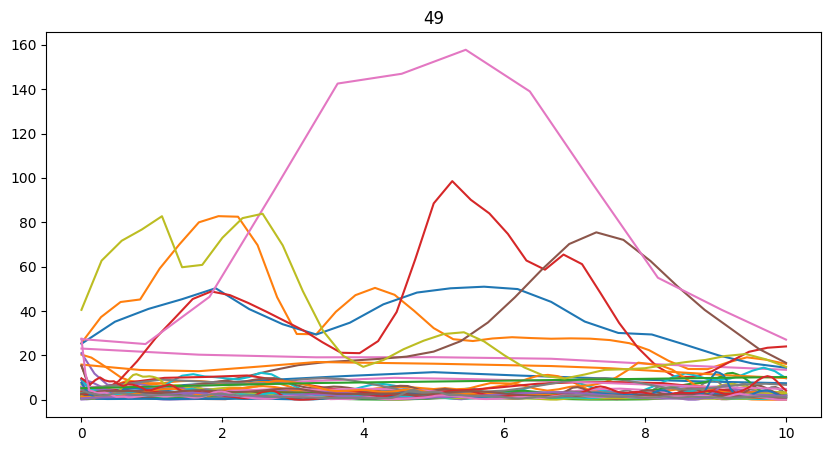

In [ ]:
Ped_diag = (
    df_clean2[df_clean2['Type'] == ' Pedestrian']
    .groupby('Track ID')['Speed_Smoothed']
    .mean()
    .reset_index()
    .rename(columns={'Speed_Smoothed': 'Avg_Speed'})
)
All_ped=Ped_diag[Ped_diag['Avg_Speed'] > 0]['Track ID'].unique()
fast_pedestrians = Ped_diag[Ped_diag['Avg_Speed'] >1.5]['Track ID'].unique()
print(f'total ped= {len(All_ped)}, fast ped= {len(fast_pedestrians)}, %= {len(fast_pedestrians)*100/len(All_ped)}')
count=0
plt.figure(figsize=(10, 5))
for i in fast_pedestrians:
    z=df_clean2[df_clean2['Track ID']==i]['Speed_Smoothed'].count()
    x_axisx= np.linspace(0,10, z) 
    plt.plot(x_axisx,df_clean2[df_clean2['Track ID']==i]['Speed_Smoothed'])
    count+=1

plt.title(count)

#tracking time filtering

45
0        3.84
8       42.56
29      75.84
58     184.00
71     201.12
93     268.00
142    409.92
177    485.28
179    498.24
220    591.68
292    756.48
307    796.96
310    800.32
311    801.12
313    808.32
Name: Track ID, dtype: float64


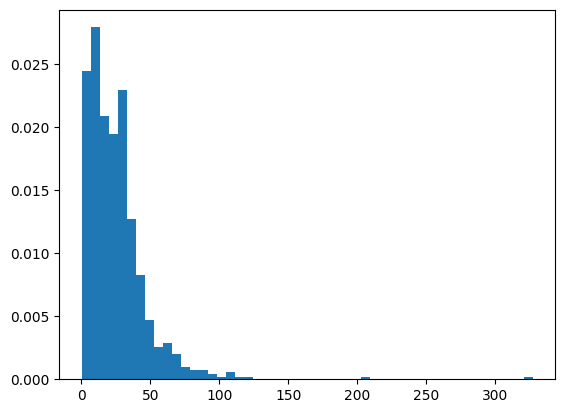

In [ ]:
time_df=(df_clean[(df_clean['Type']==' Pedestrian') ].sort_values('Track ID').groupby('Track ID')).count().reset_index()
# print (time_df.columns)
# print (df_clean.columns)
# print(time_df.head())
time_df=time_df*0.16
# print (time_df['TimeStamp'].head(10))
ShortTimePed=time_df[time_df['TimeStamp']<2]
plt.hist(time_df['TimeStamp'],bins=50,density=True)
# ShortTimePed.columns
print (ShortTimePed['Track ID'].count())
print (ShortTimePed['Track ID'].head(15))
# len((df_clean[(df_clean['Type']==' Pedestrian') ].groupby('Track ID'))['TimeStamp'].count().to_numpy())

In [ ]:

df_ped=df_clean[df_clean['Type']==' Pedestrian']
# print (df_ped['TimeStamp'].iloc[0])

# print(f'observed pedestrians :{len(df_ped.groupby("Track ID"))}')
# print (df_ped[df_ped['Track ID']==2227].sort_values('TimeStamp').head())
df_ped1= df_ped[df_ped['Track ID']==2227]

minStamp=1000
maxStamp=-1000
for values in df_ped1['TimeStamp']:
    if values<minStamp:
        minStamp=values
    if values>maxStamp:
        maxStamp=values

print(f'time stamp pos from {minStamp} to {maxStamp}')

df_all1= df_clean[df_clean['Type']!=' Pedestrian']
df_overlap_1= df_all1[(df_all1['TimeStamp']>=minStamp )& (df_all1['TimeStamp']<=maxStamp)]




time stamp pos from 785.56 to 805.72


In [ ]:
import math
def euclidean_distance(x1, y1, x2, y2):
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)


min_euc=[]
# print(df_overlap_1[df_overlap_1['TimeStamp']==1.68])
minDisPed=1000
ID=0
minDisInterval=1000
i=round(minStamp,3)
while i<=maxStamp :
    df_temp=df_ped1[df_ped1['TimeStamp']==i]
    df_temp_veh=df_overlap_1[df_overlap_1['TimeStamp']==i]
    n=0
    dis=[]
    while n<len(df_temp_veh):
        minID=0
        e_dis=euclidean_distance(df_temp_veh['X'].iloc[n],df_temp_veh['Y'].iloc[n],df_temp['X'],df_temp['Y'])
        minID=df_temp_veh['Track ID'].iloc[n]
        veh_type=df_temp_veh['Type'].iloc[n]
        dis.append(e_dis)
        n+=1
    mindis=np.min(dis)
    # print (f'TS {i:.2f}  :min dis ={mindis:.3f}')
    if minDisPed > mindis:
        minDisPed= mindis
        minDisInterval=i
        ID=minID
        Type=veh_type
    i=round(i+0.160,2)

print(f'PED ID = 2227 :: mindis ={minDisPed:.4f}, mininterval ={minDisInterval:.2f}, ID= {minID}, Type= {Type}')

PED ID = 2227 :: mindis =3.3190, mininterval =787.80, ID= 2269, Type=  Motorcycle


In [ ]:
results = []

# Get all unique pedestrian IDs
ped_ids = df_ped['Track ID'].unique()

for ped_id in ped_ids:
    df_ped1 = df_ped[df_ped['Track ID'] == ped_id].sort_values('TimeStamp')

    # Get time range
    minStamp = df_ped1['TimeStamp'].min()
    maxStamp = df_ped1['TimeStamp'].max()

    # Filter all non-pedestrians in that range
    df_all1 = df_clean[df_clean['Type'] != ' Pedestrian']
    df_overlap_1 = df_all1[(df_all1['TimeStamp'] >= minStamp) & (df_all1['TimeStamp'] <= maxStamp)]

    minDisPed = float('inf')
    minDisInterval = None
    nearestVehID = None

    i = round(minStamp, 3)
    while i <= maxStamp:
        df_temp = df_ped1[df_ped1['TimeStamp'] == i]
        df_temp_veh = df_overlap_1[df_overlap_1['TimeStamp'] == i]

        dis = []
        veh_ids = []

        for index, veh_row in df_temp_veh.iterrows():
            e_dis = euclidean_distance(veh_row['X'], veh_row['Y'], df_temp['X'].values[0], df_temp['Y'].values[0])
            dis.append(e_dis)
            veh_ids.append(veh_row['Track ID'])

        if dis:
            mindis = np.min(dis)
            if mindis < minDisPed:
                minDisPed = mindis
                minDisInterval = i
                nearestVehID = veh_ids[np.argmin(dis)]
        
        i = round(i + 0.160, 2)

    results.append({
        'Pedestrian_ID': ped_id,
        'Min_Distance': minDisPed,
        'TimeStamp': minDisInterval,
        'Nearest_Vehicle_ID': nearestVehID
    })


df_results = pd.DataFrame(results)
print(df_results.head())


KeyboardInterrupt: 

In [ ]:
df_results.to_csv('Cal_Data.csv', index=False)

In [ ]:
df_results=pd.read_csv('Cal_Data.csv')
df_results.dropna().count()

Bus_width= 2
Car_width=1.75   
Light_Truck_width=2
Motorcycle_width=0.5
Tuk_Tuk_width=1.5
Van_width=1.8
ped_width=0.25
lat_cler=1
id_to_type = dict(zip(df_clean['Track ID'], df_clean['Type']))
df_results['Type'] = df_results['Nearest_Vehicle_ID'].map(id_to_type)
res = df_results[
    ((df_results['Type'] == ' Car') & (df_results['Min_Distance'] < ((Car_width + ped_width)/2 + lat_cler))) |
    ((df_results['Type'] == ' Bus') & (df_results['Min_Distance'] < ((Bus_width + ped_width)/2 + lat_cler))) |
    ((df_results['Type'] == ' Light Truck') & (df_results['Min_Distance'] < ((Light_Truck_width + ped_width)/2 + lat_cler))) |
    ((df_results['Type'] == ' Motorcycle') & (df_results['Min_Distance'] < ((Motorcycle_width + Motorcycle_width)/2 + lat_cler))) |
    ((df_results['Type'] == ' Tuk-Tuk') & (df_results['Min_Distance'] < ((Tuk_Tuk_width + ped_width)/2 + lat_cler))) |
    ((df_results['Type'] == ' Van') & (df_results['Min_Distance'] < ((Van_width + ped_width)/2 + lat_cler)))
]
filter_data=res[res['Type']==' Motorcycle']

print(res.groupby('Type').count())
print(len(res))


              Pedestrian_ID  Min_Distance  TimeStamp  Nearest_Vehicle_ID
Type                                                                    
 Bus                      1             1          1                   1
 Car                     51            51         51                  51
 Light Truck              6             6          6                   6
 Motorcycle             161           161        161                 161
 Tuk-Tuk                119           119        119                 119
338
